In [ ]:
library(tidyverse)
library(RColorBrewer)
library(sf)
library(maps)
library(mapdata)

In [2]:
library(ggthemes)
library(ggrepel)
library(stringr)

In [3]:
f1_circuits <- read_csv("circuits.csv", show_col_types = FALSE)

In [4]:
options(repr.plot.width =15, repr.plot.height =10)

In [5]:
# Create color palette for different regions/continents
get_continent <- function(country) {
  case_when(
    country %in% c("Australia", "Japan", "China", "Singapore", "Malaysia", "South Korea", "India") ~ "Asia-Pacific",
    country %in% c("United States", "Canada", "Mexico", "Brazil", "Argentina") ~ "Americas", 
    country %in% c("United Kingdom", "Germany", "Italy", "France", "Spain", "Belgium", "Netherlands", 
                  "Hungary", "Austria", "Monaco", "Portugal", "Turkey", "Russia", "Azerbaijan") ~ "Europe",
    country %in% c("Bahrain", "United Arab Emirates", "Saudi Arabia", "Qatar") ~ "Middle East",
    country %in% c("South Africa", "Morocco") ~ "Africa",
    TRUE ~ "Other"
  )
}

f1_circuits$continent <- get_continent(f1_circuits$country)
f1_circuits$circuitRef <- str_to_title(f1_circuits$circuitRef)

# Define color palette
continent_colors <- c(
  "Europe" = "#FF6B6B",
  "Americas" = "#4ECDC4", 
  "Asia-Pacific" = "#45B7D1",
  "Middle East" = "#FFA07A",
  "Africa" = "#98D8C8",
  "Other" = "#F7DC6F"
)

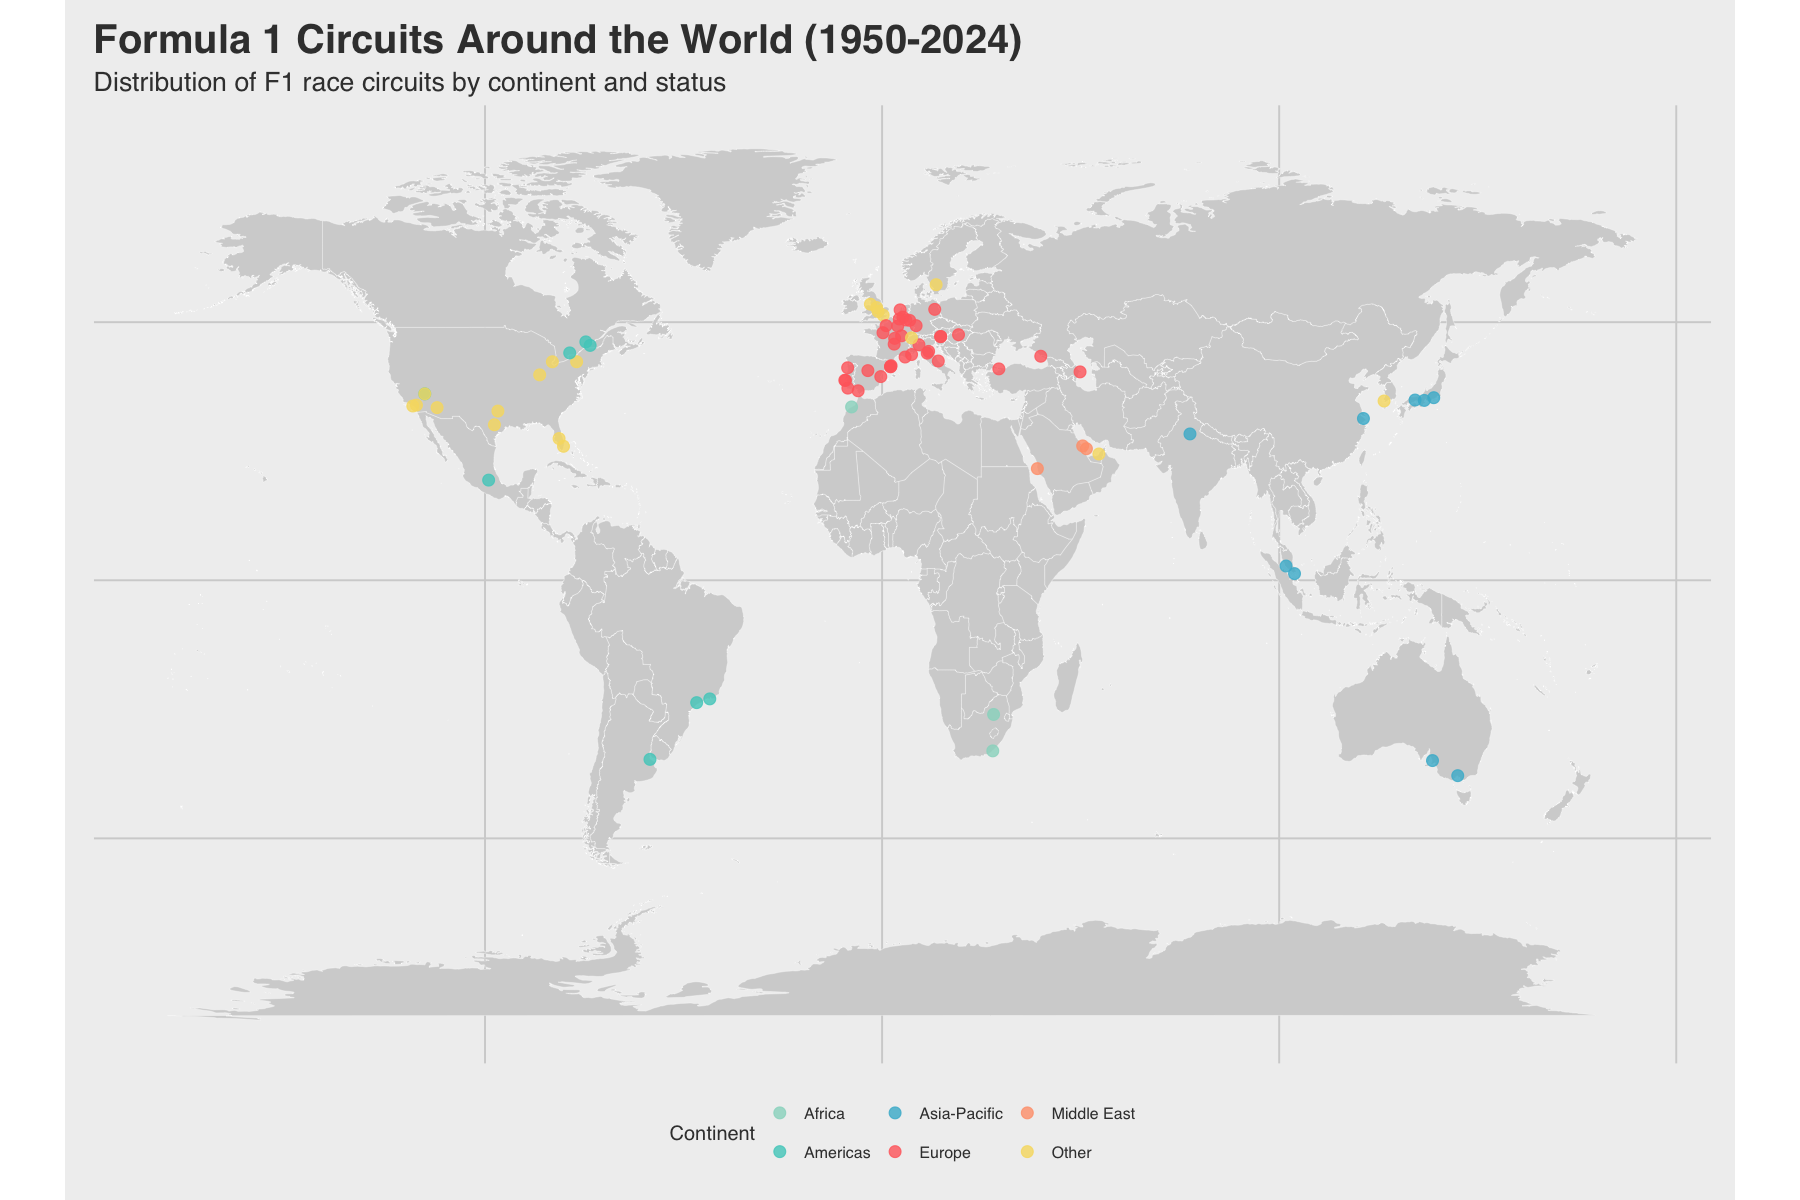

In [22]:
# Create static world map with ggplot2 as alternative
world_map <- map_data("world")

world_circuits <- f1_circuits

static_world_map <- ggplot() +
  geom_polygon(data = world_map, 
               aes(x = long, y = lat, group = group), 
               fill = "lightgray", color = "white", linewidth = 0.1) +
  geom_point(data = world_circuits, 
             aes(x = lng, y = lat, color = continent), 
             size = 3, alpha = 0.8) +
  scale_color_manual(values = continent_colors, name = "Continent") +
  labs(title = "Formula 1 Circuits Around the World (1950-2024)",
       subtitle = "Distribution of F1 race circuits by continent and status",
       x = "Longitude", y = "Latitude") +
  theme_fivethirtyeight() +
  theme(
    panel.grid = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "bottom",
    plot.title = element_text(size = 24, face = "bold"),
    plot.subtitle = element_text(size = 16)
  ) +
  coord_fixed(1.3)
print(static_world_map)

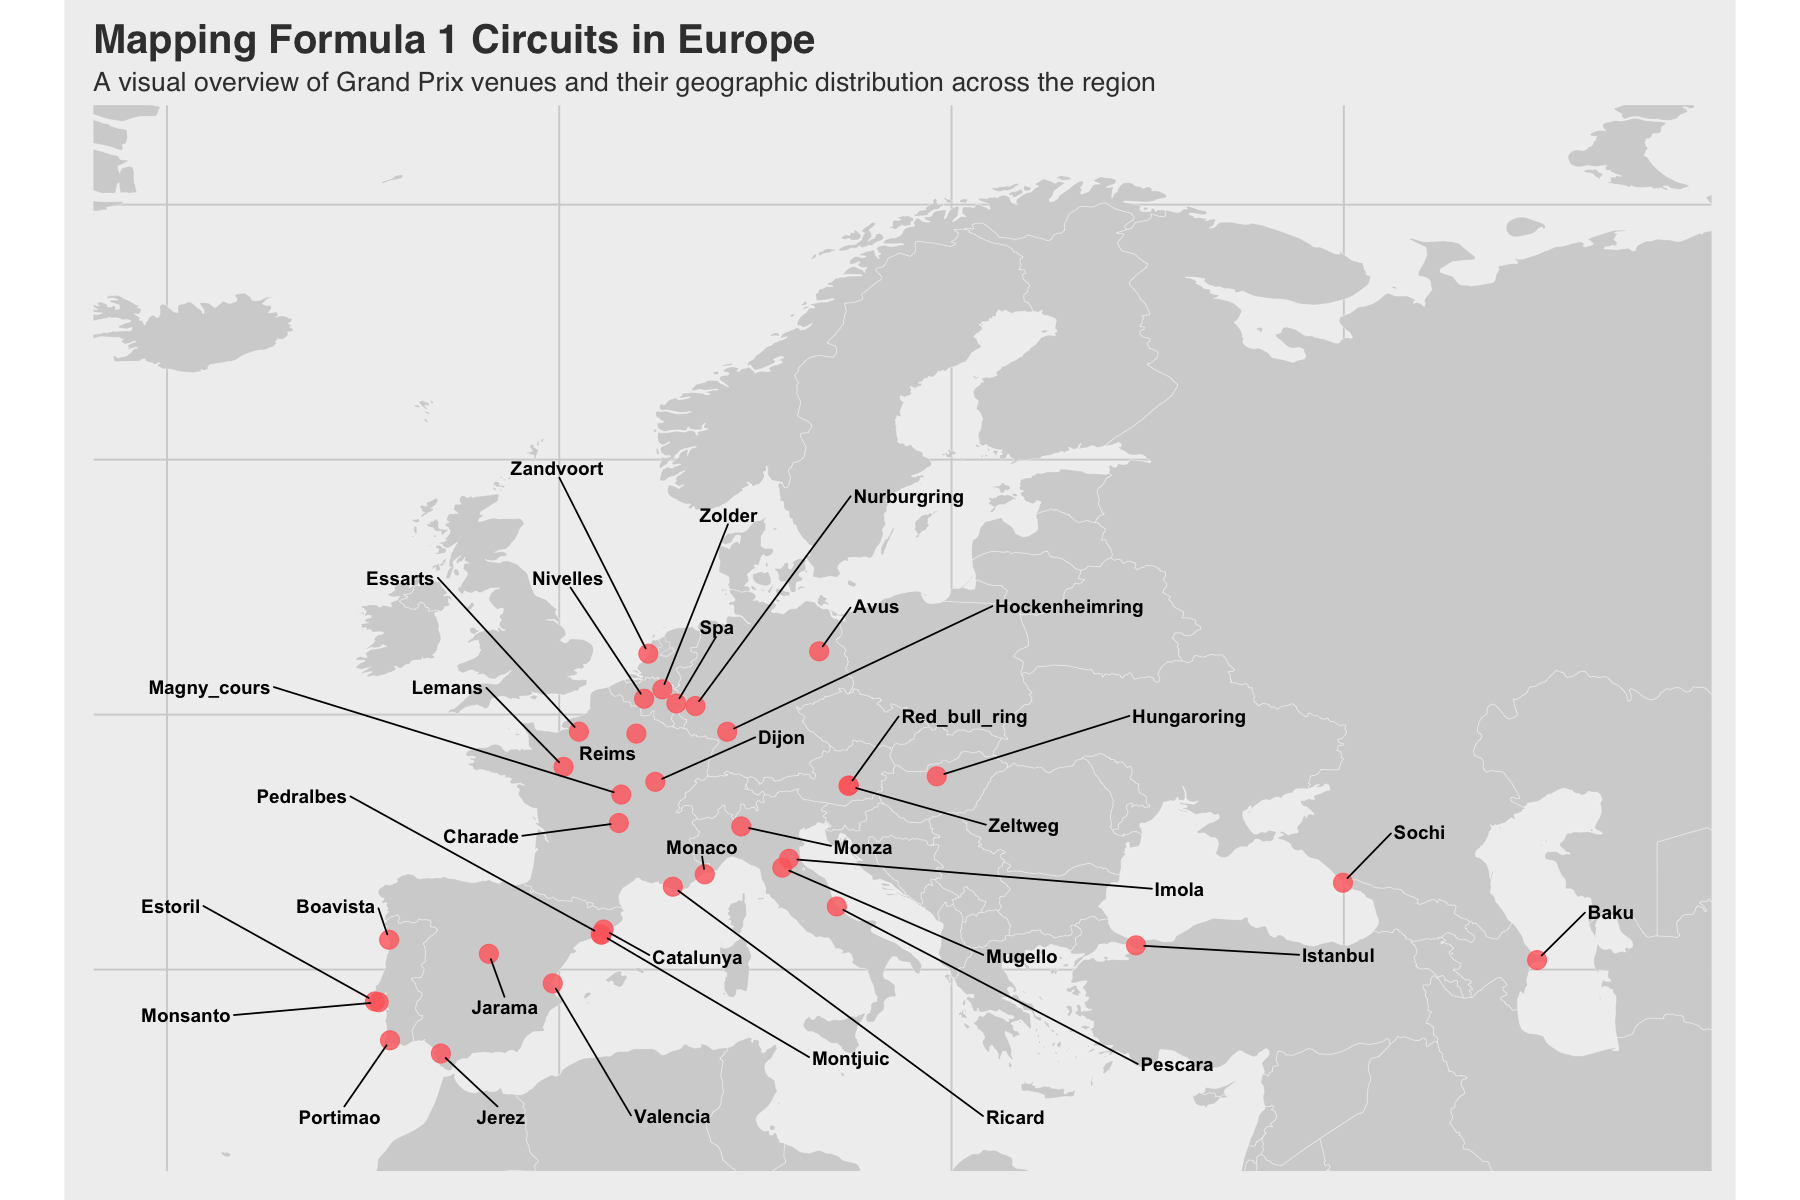

In [27]:
europe_circuits <- f1_circuits %>% filter(continent == "Europe")

static_europe_map <- ggplot() +
  geom_polygon(data = world_map, 
               aes(x = long, y = lat, group = group), 
               fill = "lightgray", color = "white", linewidth = 0.1) +
                 coord_fixed(1.3, xlim = c(-20, 55), ylim = c(34, 72)) +
  geom_point(data = europe_circuits, 
             aes(x = lng, y = lat, color = continent), 
             size = 5, alpha = 0.8) +
  geom_text_repel(
    data = europe_circuits,
    aes(x = lng, y = lat, label = circuitRef),
    size = 4,
    fontface = "bold",
    box.padding = 2.0,
    point.padding = 0.5,
    segment.color = "black",
      max.overlaps =Inf
  ) +
  scale_color_manual(values = continent_colors, name = "Continent") +
  labs(
    title = "Mapping Formula 1 Circuits in Europe",
    subtitle = "A visual overview of Grand Prix venues and their geographic distribution across the region",
    x = "Longitude", y = "Latitude") +
  theme_fivethirtyeight() +
  theme(
    panel.grid = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "none",
    plot.title = element_text(size = 24, face = "bold"),
    plot.subtitle = element_text(size = 16)
  )

print(static_europe_map)

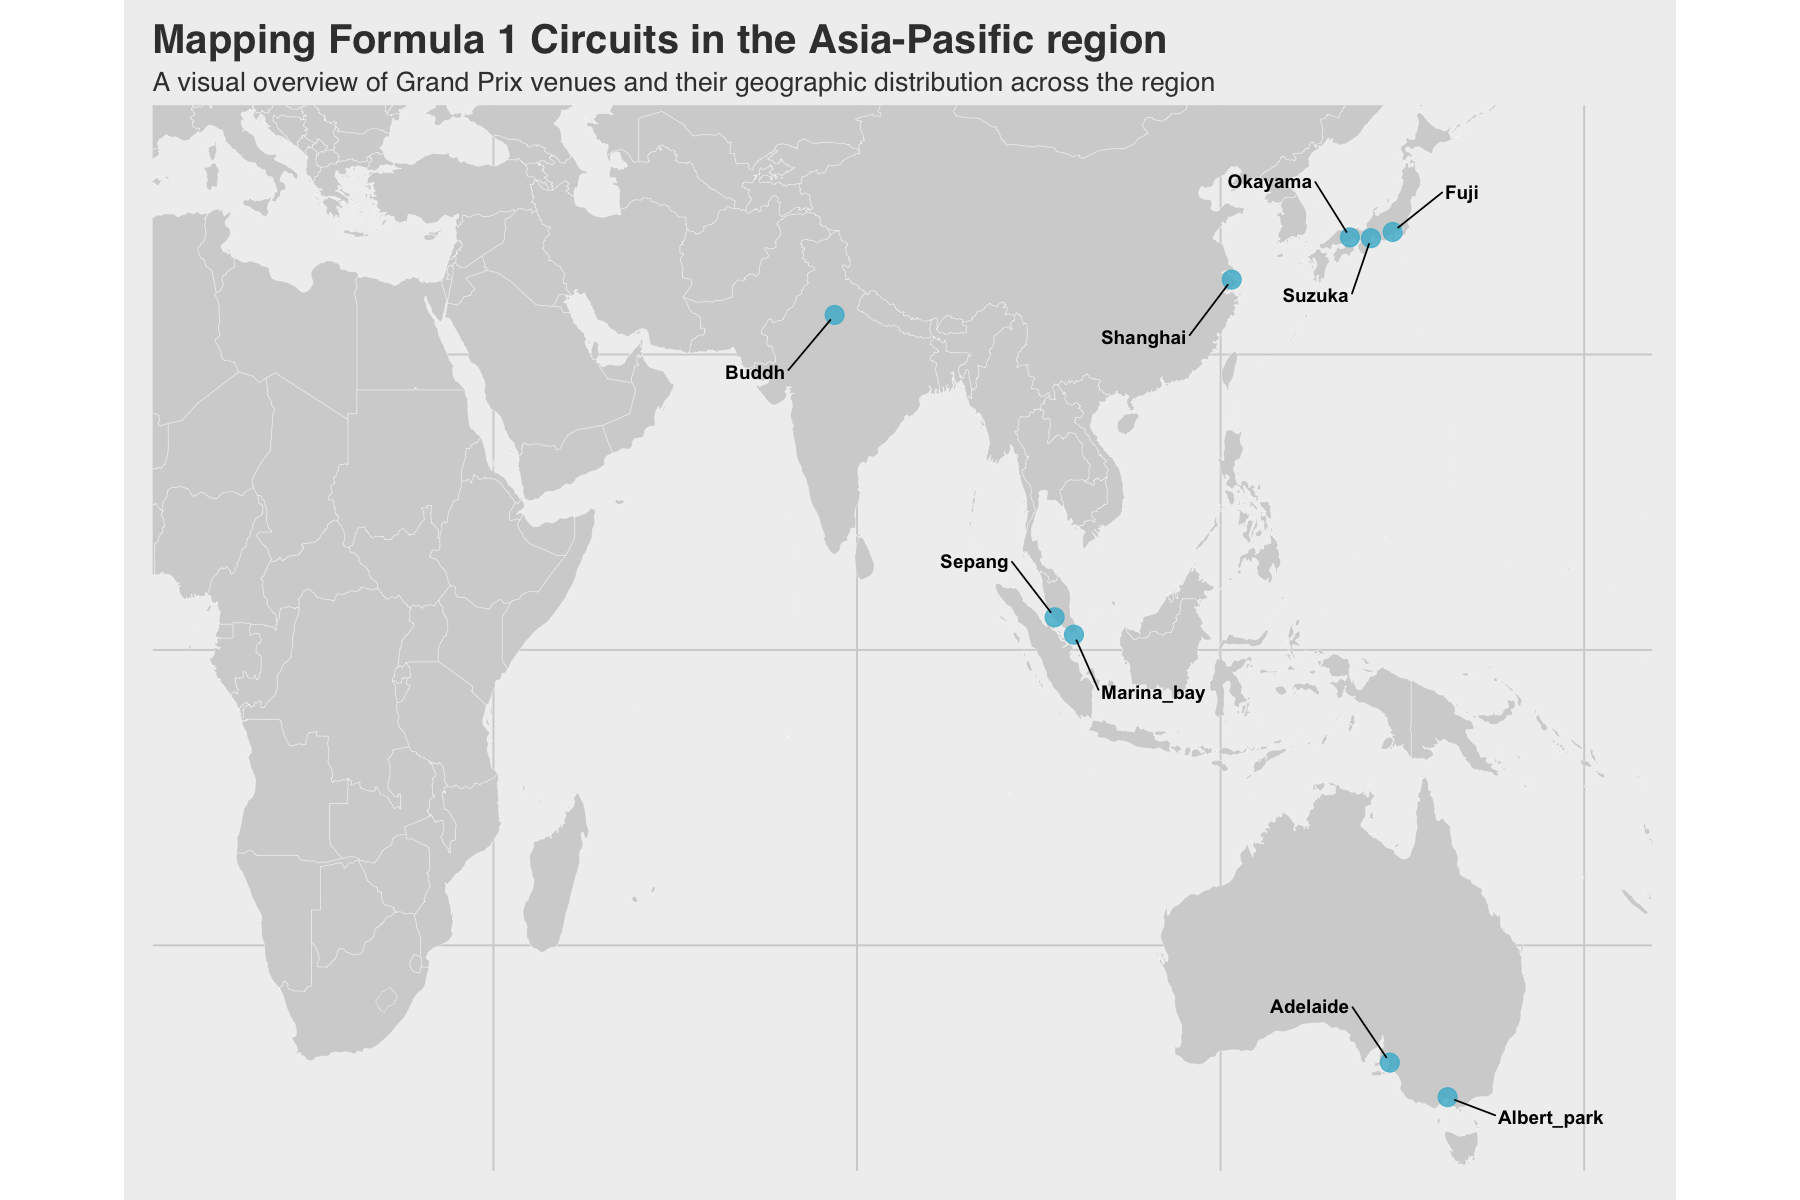

In [33]:
asian_circuits <- f1_circuits %>% filter(continent == "Asia-Pacific")

static_asian_map <- ggplot() +
  geom_polygon(data = world_map, 
               aes(x = long, y = lat, group = group), 
               fill = "lightgray", color = "white", linewidth = 0.1) +
                 coord_fixed(1.3, xlim = c(10, 160), ylim = c(-40, 42)) +
  geom_point(data = asian_circuits, 
             aes(x = lng, y = lat, color = continent), 
             size = 5, alpha = 0.8) +
  geom_text_repel(
    data = asian_circuits,
    aes(x = lng, y = lat, label = circuitRef),
    size = 4,
    fontface = "bold",
    box.padding = 2.0,
    point.padding = 0.5,
    segment.color = "black"
  ) +
  scale_color_manual(values = continent_colors, name = "Continent") +
  labs(
    title = "Mapping Formula 1 Circuits in the Asia-Pasific region",,
    subtitle = "A visual overview of Grand Prix venues and their geographic distribution across the region",
    x = "Longitude", y = "Latitude") +
  theme_fivethirtyeight() +
  theme(
    panel.grid = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "none",
    plot.title = element_text(size = 24, face = "bold"),
    plot.subtitle = element_text(size = 16)
  )

print(static_asian_map)

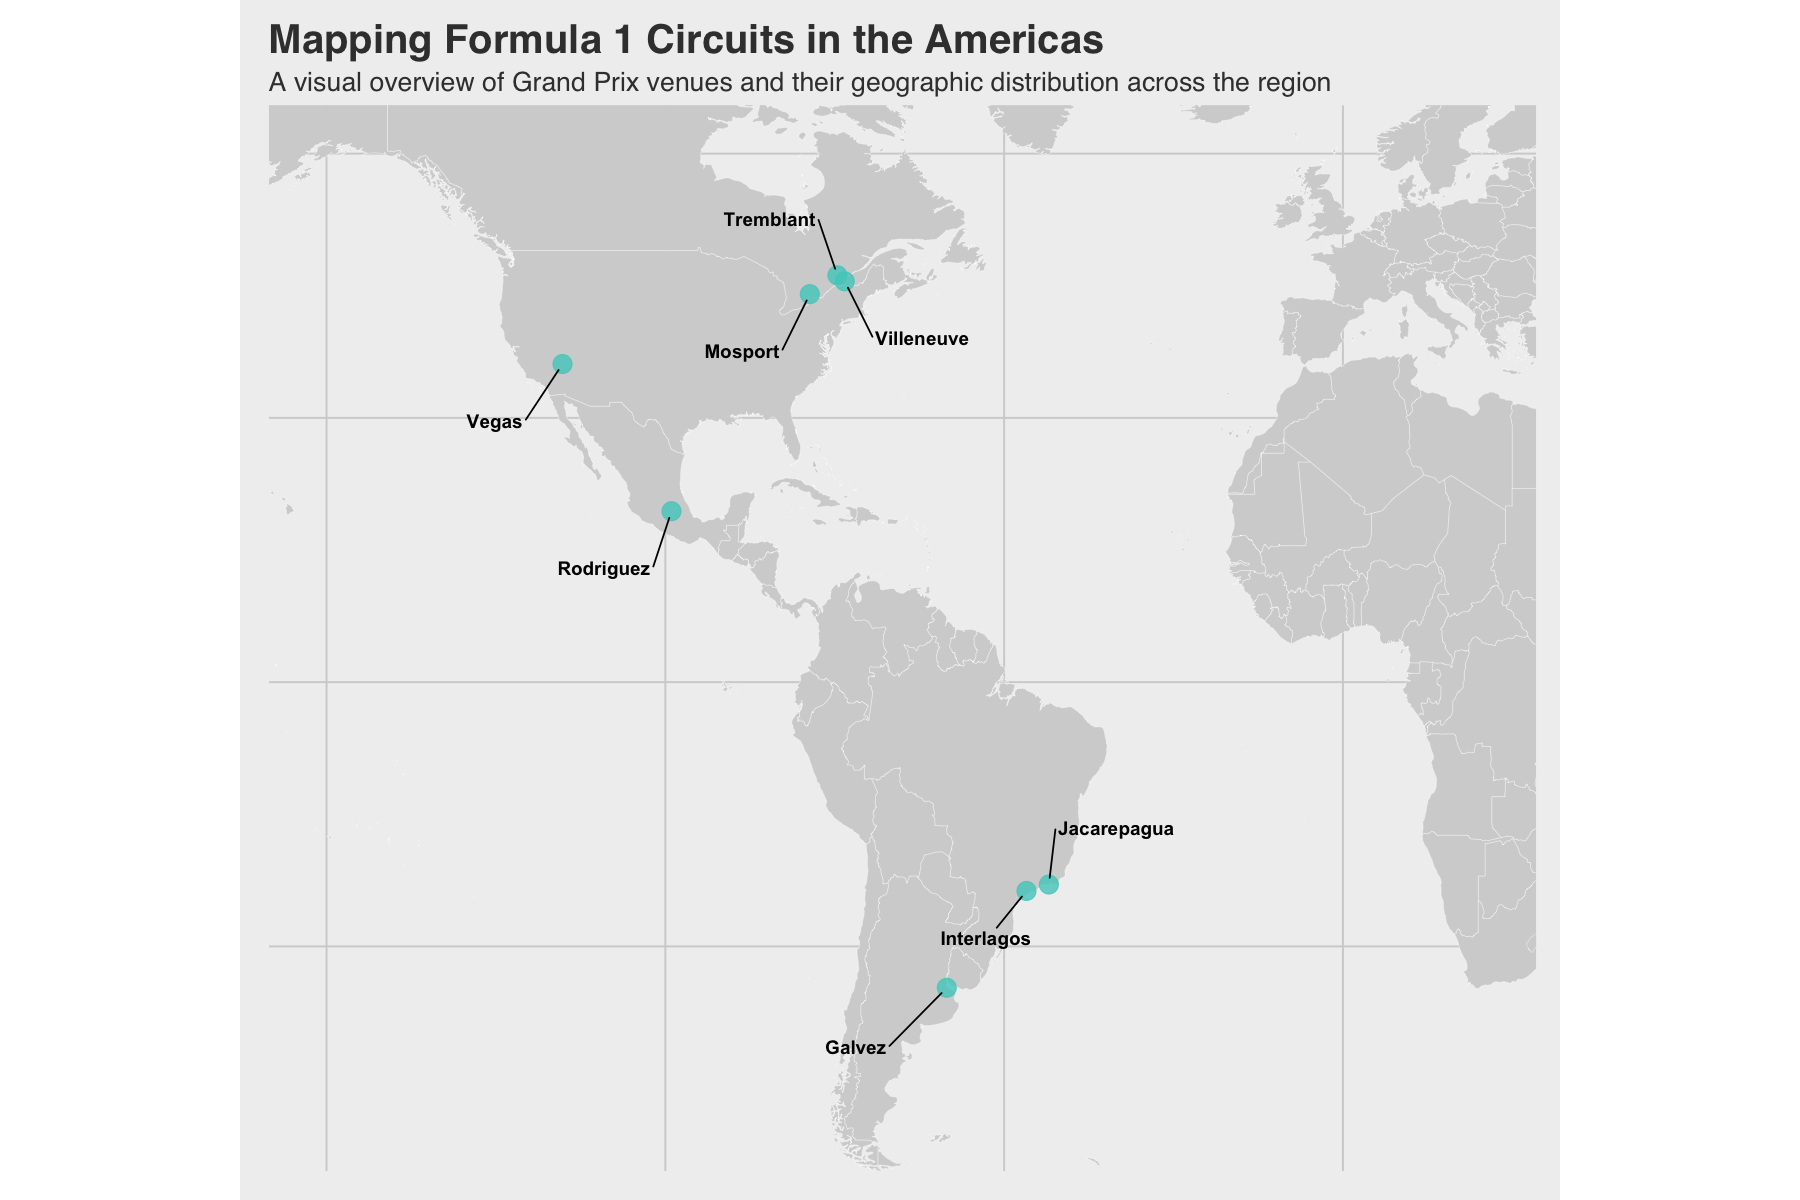

In [32]:
america_circuits <- f1_circuits %>% filter(continent == "Americas")

static_america_map <- ggplot() +
  geom_polygon(data = world_map, 
               aes(x = long, y = lat, group = group), 
               fill = "lightgray", color = "white", linewidth = 0.1) +
                 coord_fixed(1.3, xlim = c(-150, 20), ylim = c(-50, 60)) +
  geom_point(data = america_circuits, 
             aes(x = lng, y = lat, color = continent), 
             size = 5, alpha = 0.8) +
  geom_text_repel(
    data = america_circuits,
    aes(x = lng, y = lat, label = circuitRef),
    size = 4,
    fontface = "bold",
    box.padding = 2.0,
    point.padding = 0.5,
    segment.color = "black"
  ) +
  scale_color_manual(values = continent_colors, name = "Continent") +
  labs(
    title = "Mapping Formula 1 Circuits in the Americas",
    subtitle = "A visual overview of Grand Prix venues and their geographic distribution across the region",
    x = "Longitude", y = "Latitude") +
  theme_fivethirtyeight() +
  theme(
    panel.grid = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "none",
    plot.title = element_text(size = 24, face = "bold"),
    plot.subtitle = element_text(size = 16)
  )

print(static_america_map)

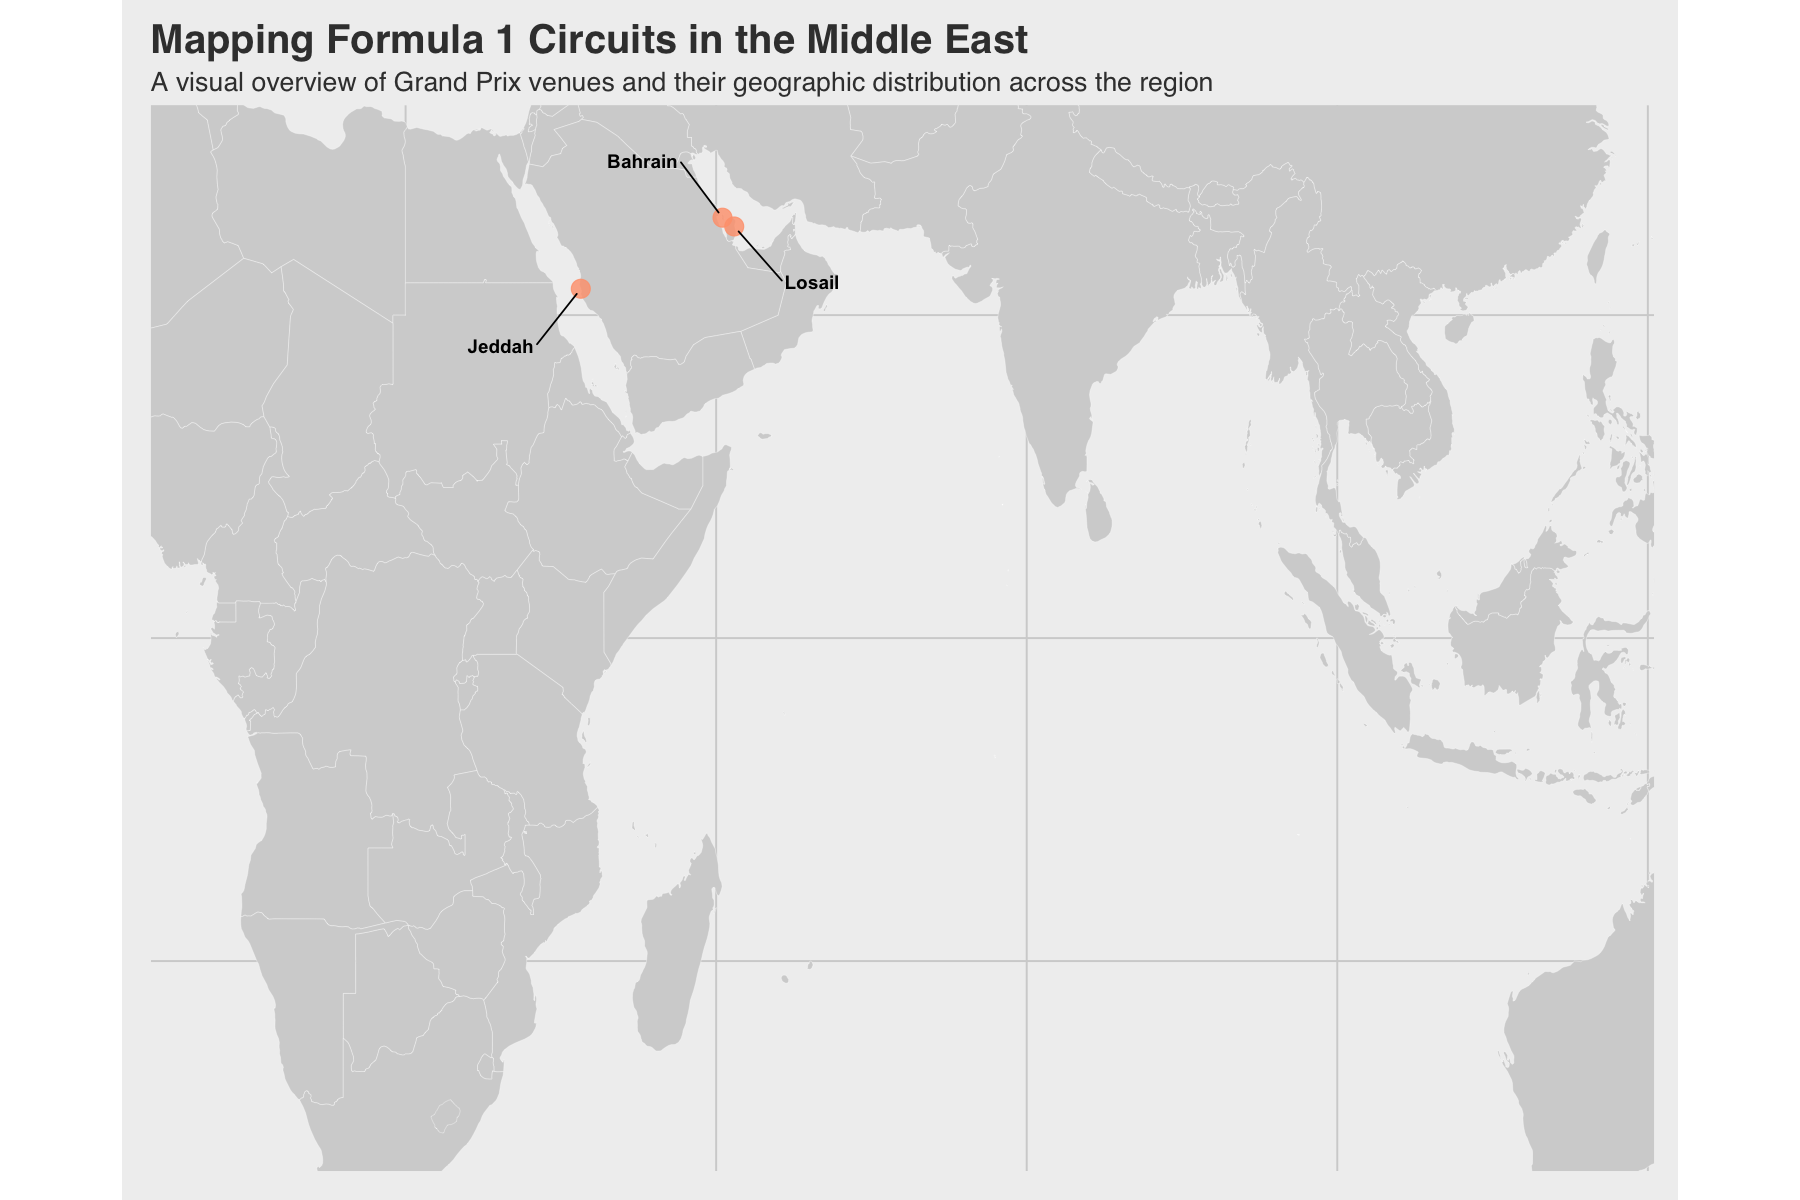

In [30]:
middle_east_circuits <- f1_circuits %>% filter(continent == "Middle East")

static_middle_east_map <- ggplot() +
  geom_polygon(data = world_map, 
               aes(x = long, y = lat, group = group), 
               fill = "lightgray", color = "white", linewidth = 0.1) +
                 coord_fixed(1.3, xlim = c(10, 120), ylim = c(-30, 30)) +
  geom_point(data = middle_east_circuits, 
             aes(x = lng, y = lat, color = continent), 
             size = 5, alpha = 0.8) +
  geom_text_repel(
    data = middle_east_circuits,
    aes(x = lng, y = lat, label = circuitRef),
    size = 4,
    fontface = "bold",
    box.padding = 2.0,
    point.padding = 0.5,
    segment.color = "black"
  ) +
  scale_color_manual(values = continent_colors, name = "Continent") +
  labs(
    title = "Mapping Formula 1 Circuits in the Middle East",
    subtitle = "A visual overview of Grand Prix venues and their geographic distribution across the region",
    x = "Longitude", y = "Latitude") +
  theme_fivethirtyeight() +
  theme(
    panel.grid = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "none",
    plot.title = element_text(size = 24, face = "bold"),
    plot.subtitle = element_text(size = 16)
  )

print(static_middle_east_map)

In [34]:
ggsave("static_america_map.png", plot = static_america_map, width = 15, height = 10, dpi = 300)
ggsave("static_middle_east_map.png", plot = static_middle_east_map, width = 15, height = 10, dpi = 300)
ggsave("static_world_map.png", plot = static_world_map, width = 15, height = 10, dpi = 300)
ggsave("static_europe_map.png", plot = static_europe_map, width = 15, height = 10, dpi = 300)
ggsave("static_asian_map.png", plot = static_asian_map, width = 15, height = 10, dpi = 300)